# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [ ]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

## how do you get rid of % from a string?

let's say we have cityname = "Minneapolis, MN" in the df 
we want to remove Minneapolis
use REPLACE
to replace the % in ABV: replace the "%" with " " ((inside of quotes is empty))
cityname.replace("Minneapolis","Worst city")
columnname.replace.("string to be replaced","replacement")
output:'Worst city, MN'

df.location.replace() doesn't work we need to treat it as a string!

need to do:::  df.location.str.replace("Minneapolis","Worst City")

NOTE replace doesn't save it back into cityname. to change citname PERMANENTLY 

cityname = cityname.replace("Minneapolis","Worst City")

SAVE IT BACK INTO THE DATA FRAME:: df['Location']=df['Location'].str.replace("Minneapolis","Worst City",inplace=True)

you could also create a new column

df['IBUS'].hist(bins=30)
will help look at the bins


df['Style'].value_counts(normalize=True, dropna=False)
**normalize=True** will give you the percentage! BUT BUT BUT
**value_counts doesn't count missing data!!**
you need to acknowledge NaN values
NaN=na=null=N/A

In [ ]:
df = pd.read_csv("craftcans.csv",na_values=['???','Unknown','UNKNOWN','unknown'])
df.head()

## How many rows do you have in the data? What are the column types?

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.columns

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [ ]:
df['Brewery'].value_counts(ascending=False).head(10)

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [ ]:
df['Size'].value_counts()

## What is the most common ABV? (alcohol by volume)

In [ ]:
df['ABV'].value_counts().head(3)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [ ]:
df['ABV'].head(5)

In [ ]:
#get rid of the % and replace it with nothing
#then overwrite the old column so it doesn't have any %s in it anymore
df['ABV']= df['ABV'].str.replace("%","").astype(float).head(3)


In [ ]:
#convert the column ABV, which is currently an object, to a float
# df['ABV']= df['ABV'].str.replace("%","").astype(float)
# just add .astype(float) to the end of this

In [ ]:
df.dtypes

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

In [ ]:
df.head()

## What are the top 10 cities in the US for canned craft beer?

In [ ]:
df['Location'].value_counts(ascending=False).head(10)

## List all of the beer from Brooklyn, NY

In [ ]:
#  df['column name'].str.contains('word you're looking for')
#get rid of NA values when that doesn't work
#save it into a new data frame with only the info from Brooklyn so we can do things to it easily later
brooklyn_df = df[df['Location'].str.contains('Brooklyn, NY', na=False)]
brooklyn_df

## What brewery in Brooklyn puts out the most cans of beer?

In [ ]:
#Find all the things in Brooklyn with the code we used above
#here's how you find the most 'productive' breweries in Brooklyn ['Brewery'].values_count()
brooklyn_df['Brewery'].value_counts()

## What are the five most popular styles of beer produced by Sixpoint?

In [ ]:
#find all the beers produced by Sixpoint
brooklyn_df[brooklyn_df['Brewery'].str.contains('Sixpoint Craft Ales', na=False)]

In [ ]:
#then sort them by style and add a value count
brooklyn_df[brooklyn_df['Brewery'].str.contains('Sixpoint Craft Ales', na=False)]['Style'].value_counts()

## List all of the breweries in New York state. Then count them.

In [ ]:
df[df['Location'].str.contains(' NY', na=False)]

In [ ]:
df[df['Location'].str.contains(' NY', na=False)]['Brewery'].count()

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [ ]:
df['ABV'].mean()

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

In [ ]:
df['IBUs'].hist(bins=30)

## List all of the beers with IBUs above the 75th percentile

In [ ]:
#first find what the 75th percentile is and you don't have to calculate it on your own which is GREAT
df['IBUs'].describe()

In [ ]:
df[df['IBUs']>64].head()

## List all of the beers with IBUs below the 25th percentile

In [ ]:
df[df['IBUs']<21].head()

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

In [293]:
#first find all the beer styles and cluster them together
#here we're saying: in the df, group things by 'Style' and IBUS, and do an action on IBU-find the mean.
IBUs_df = df.groupby('Style')['IBUs'].mean().sort_values().dropna()

In [ ]:
IBUs_df.to_frame()

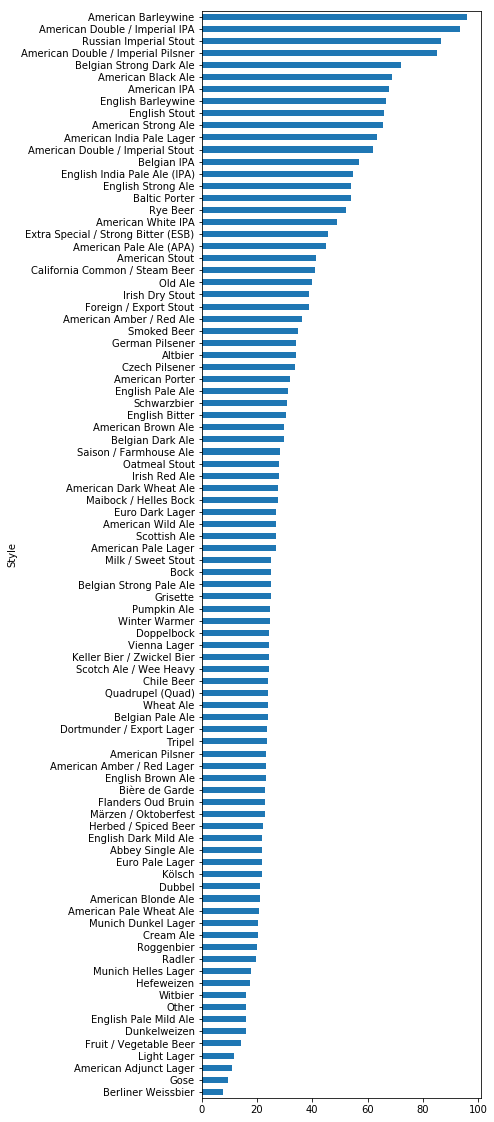

In [295]:
IBUs_df.plot(kind='barh',x='Style',y='IBUs',figsize=(5,20))


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [296]:
df['IBUs'].describe()
#let's get a benchmark for what is high/low IBU

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [297]:
#I don't know what I find this helpful, but I do
df.sort_values(by='IBUs',ascending=False).head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.2,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.9,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.0,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.9,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0


In [298]:
#make a new DF with IBUs over 40 and look at it
high_df = df[df.IBUs > 40]
high_df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42.0


In [299]:
#same for low
low_df = df[df.IBUs < 40]
low_df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.7,25.0


In [300]:
#now we can sort each new df by style
low_df.sort_values('Style').head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
787,Abbey's Single Ale (Current),Destihl Brewery,"Bloomington, IL",Abbey Single Ale,12 oz.,4.9,22.0
184,Abbey's Single (2015- ),Destihl Brewery,"Bloomington, IL",Abbey Single Ale,12 oz.,4.9,22.0
755,Alaskan Amber,Alaskan Brewing Company,"Juneau, AK",Altbier,12 oz.,5.3,18.0
84,Tip Off,Sun King Brewing Company,"Indianapolis, IN",Altbier,16 oz.,5.2,29.0
1558,Double Bag,Long Trail Brewing Company,"Bridgewater Corners, VT",Altbier,16 oz.,7.2,33.0


In [301]:
#and then do a value count and find the top 5 for each!
low_df['Style'].value_counts().head(5)

American Blonde Ale         58
American Pale Wheat Ale     57
American Amber / Red Ale    54
American Pale Ale (APA)     49
American Brown Ale          31
Name: Style, dtype: int64

In [302]:
#we're so happy now!
high_df['Style'].value_counts().head(5)

American IPA                      286
American Pale Ale (APA)            90
American Double / Imperial IPA     74
American Amber / Red Ale           21
American Black Ale                 18
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [336]:
df.dropna(subset=['IBUs'], inplace=True)
#this is a good thing!! here we're dropping all the NA values in the specificed column and overwriting it yay yay

In [341]:
wheat_df = df[(df['Style']=='American Pale Wheat Ale') | (df['Style']=='Hefeweizen') |(df['Style']=='Witbier')]
wheat_df.groupby('Style')['IBUs'].mean()

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

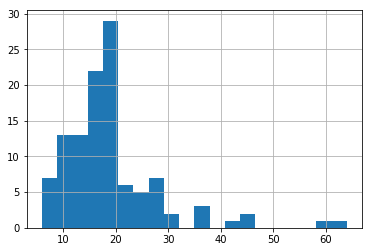

In [362]:
wheat_df['IBUs'].hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [356]:
IPA_df = df[df['Style'].str.contains('IPA',na=False)].head()


In [357]:
IPA_df.groupby('Style')['IBUs'].mean()


Style
American Double / Imperial IPA    78.666667
American IPA                      57.500000
Name: IBUs, dtype: float64

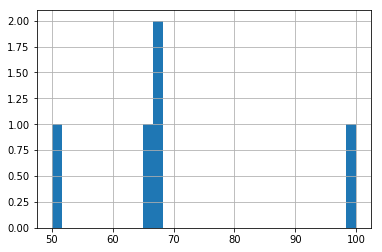

In [361]:
IPA_df['IBUs'].hist(bins=30)

## Plot those two histograms on top of one another

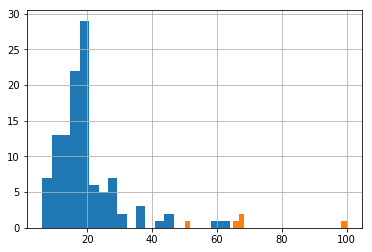

In [363]:
wheat_df['IBUs'].hist(bins=20)
IPA_df['IBUs'].hist(bins=30)

## Compare the ABV of wheat beers vs. IPAs 

In [ ]:
wheat_df = df[(df['Style']=='American Pale Wheat Ale') | (df['Style']=='Hefeweizen') |(df['Style']=='Witbier')]


In [365]:
df.groupby('Style')['ABV'].mean()

Style
Abbey Single Ale                      4.900000
Altbier                               5.462500
American Adjunct Lager                4.654545
American Amber / Red Ale              5.719481
American Amber / Red Lager            4.806250
American Barleywine                   9.900000
American Black Ale                    7.315000
American Blonde Ale                   5.014754
American Brown Ale                    5.784211
American Dark Wheat Ale               5.220000
American Double / Imperial IPA        8.769333
American Double / Imperial Pilsner    7.500000
American Double / Imperial Stout      9.666667
American IPA                          6.480731
American India Pale Lager             6.266667
American Pale Ale (APA)               5.497386
American Pale Lager                   5.106250
American Pale Wheat Ale               4.755738
American Pilsner                      4.814286
American Porter                       6.033333
American Stout                        6.137500
America